In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sklearn

# Building an Image Classifier using the Sequential API

In [1]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, Y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
X_test = X_test / 255

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle book",
]


# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28,28]))#converts each input image into a 1D array
# model.add(keras.layers.Dense(300,activation="relu")) # each dense layer manages its own weight matrix
# #also manages a vector of bias terms(one per neuron)
# model.add(keras.layers.Dense(100, activation = "relu"))
# model.add(keras.layers.Dense(10,activation="softmax"))
# alternatively
from tensorflow.keras import initializers

model = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(
            300,
            kernel_initializer=initializers.RandomNormal(stddev=0.01),
            activation="relu",
        ),
        keras.layers.Dense(100, kernel_initializer="random_normal", activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)
# keras.utils.plot_model(model, to_file="model.png")

# models summary
# model.summary()

# getting a model's layer by index

hidden1 = model.layers[1]

# all of the parameters of models layers can be accessed using the models get_weights() method
weights, biases = hidden1.get_weights()

# print(weights)
# print(biases)

# you can use a different matrix connection weights (i.e a kernel) by setting kernel_initializer:


#
# Compiling the model
#
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model.compile(
    loss=keras.losses.sparse_categorical_crossentropy,
    optimizer=keras.optimizers.SGD(),
    metrics=[keras.metrics.sparse_categorical_accuracy],
)

#
# Training and Evaluating the model
#

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
# afinal results of loss: 0.2434 - sparse_categorical_accuracy: 0.9123 -
# val_loss: 0.3244 - val_sparse_categorical_accuracy: 0.8832
# you could also provide validation_split =0.1 argument
# split the lst 10% of the data before shuffling for validation
# history = model.fit(X_train, y_train, epochs=30, validation_split=0.1)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 122us/sample - loss: 0.7970 - sparse_categorical_accuracy: 0.7417 - val_loss: 0.5570 - val_sparse_categorical_accuracy: 0.8090
Epoch 2/10
55000/55000 [==============================] - 6s 104us/sample - loss: 0.5089 - sparse_categorical_accuracy: 0.8244 - val_loss: 0.4721 - val_sparse_categorical_accuracy: 0.8364
Epoch 3/10
55000/55000 [==============================] - 6s 112us/sample - loss: 0.4583 - sparse_categorical_accuracy: 0.8402 - val_loss: 0.4341 - val_sparse_categorical_accuracy: 0.8506
Epoch 4/10
55000/55000 [==============================] - 6s 107us/sample - loss: 0.4331 - sparse_categorical_accuracy: 0.8486 - val_loss: 0.4076 - val_sparse_categorical_accuracy: 0.8614
Epoch 5/10
55000/55000 [==============================] - 6s 109us/sample - loss: 0.4134 - sparse_categorical_accuracy: 0.8561 - val_loss: 0.4231 - val_sparse_categorical_accuracy: 0.8532
Epoch 6/10


The return object of calling the fit() is a History object which contains the training parameters, list of epochs, and the loss and other metrics calculated at the end of each epoch


In [2]:
history.history

{'loss': [0.7970405852187764,
  0.5088890563618053,
  0.458254104865681,
  0.43310931422060184,
  0.4133852665034207,
  0.3981563054648313,
  0.3852623355041851,
  0.3730406456860629,
  0.3617751325715672,
  0.3523708157344298],
 'sparse_categorical_accuracy': [0.74167275,
  0.8244,
  0.8401818,
  0.8486,
  0.8561091,
  0.86030906,
  0.8643818,
  0.8670727,
  0.87216365,
  0.8739273],
 'val_loss': [0.5569957602024078,
  0.47213344984054567,
  0.43411632418632506,
  0.4075664784193039,
  0.4230945132255554,
  0.38700309295654295,
  0.3835307305335999,
  0.37758952791690825,
  0.38513623657226564,
  0.3552913844347],
 'val_sparse_categorical_accuracy': [0.809,
  0.8364,
  0.8506,
  0.8614,
  0.8532,
  0.8668,
  0.8638,
  0.8708,
  0.8668,
  0.8772]}

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
val_loss = pd.DataFrame(history.history)
train_loss =val_loss.loc[:,["loss"]].copy()
train_loss.index -= 0.5
val_loss.reset_index(inplace=True)
train_loss.reset_index(inplace=True)

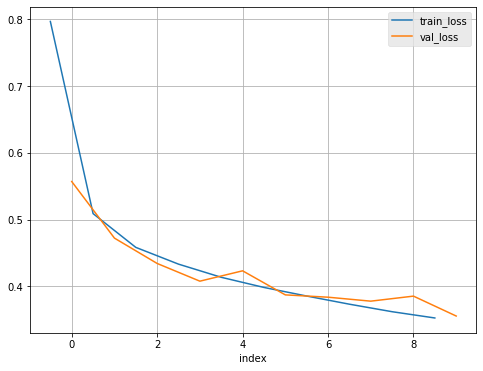

In [4]:
fig, ax = plt.subplots(figsize=(8,6))
#need to shift the training loss by half an epoch
plt.style.use("ggplot")
train_loss.plot(kind='line',y="loss",x="index",label='train_loss',ax=ax)
val_loss.plot(kind="line",y="val_loss",x="index",label="val_loss",ax=ax)
plt.show()

In [5]:
model.evaluate(X_test,Y_test)

[0.3903437046289444, 0.8592]

### Making predictions with the model

In [6]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.19, 0.  , 0.09, 0.  , 0.72],
       [0.  , 0.  , 0.96, 0.  , 0.01, 0.  , 0.03, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

### Use model's `predict_classes()` method if you only want the class with the highest probability (even if that probability might be low)

In [10]:
y_pred = model.predict_classes(X_new)
np.array(class_names)[y_pred]

array(['Ankle book', 'Pullover', 'Trouser'], dtype='<U11')

# Building a Regression MLP using the Sequential API

Example will work with scikit learn housing data (no missing value only numerical features for simplicity sake)

In [9]:

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

In [15]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_) #telling keras how the to connect the layers
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_],outputs=[output])


Handling multiple inputs

In [21]:
input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30,activation="relu")(input_B)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name="output")(concat)
model = keras.Model(inputs=[input_A,input_B],outputs=[output])

In [28]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:,2:]
X_valid_A, X_valid_B = X_valid[:,:5], X_valid[:,2:]
X_test_A, X_test_B = X_test[:,:5], X_test[:,2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [31]:
history = model.fit((X_train_A,X_train_B),y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B),y_test)

y_pred = model.predict((X_new_A,X_new_B))

In [25]:
y_pred

array([[0.36892924],
       [1.6819052 ],
       [3.0886497 ]], dtype=float32)

Adding an auxillory output to ensure the underlying part of the network learns something useful without relying on the rest of the network to do this you would need to add an extra output how would you do this?

In [ ]:
input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30,activation="relu")(input_B)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name="output")(concat)
aux_output = keras.layers.Dense(1,name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A,input_B],outputs=[output,aux_output])

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

In [7]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]),keras.layers.Dense(1)
])
model.compile(
    loss="mean_squared_error",optimizer="sgd"
)
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 84us/sample - loss: 0.9294 - val_loss: 6.1815
Epoch 2/20
11610/11610 [==============================] - 1s 48us/sample - loss: nan - val_loss: nan
Epoch 3/20
11610/11610 [==============================] - 1s 48us/sample - loss: nan - val_loss: nan
Epoch 4/20
11610/11610 [==============================] - 1s 51us/sample - loss: nan - val_loss: nan
Epoch 5/20
11610/11610 [==============================] - 1s 50us/sample - loss: nan - val_loss: nan
Epoch 6/20
11610/11610 [==============================] - 1s 48us/sample - loss: nan - val_loss: nan
Epoch 7/20
11610/11610 [==============================] - 1s 45us/sample - loss: nan - val_loss: nan
Epoch 8/20
11610/11610 [==============================] - 0s 43us/sample - loss: nan - val_loss: nan
Epoch 9/20
11610/11610 [==============================] - 0s 43us/sample - loss: nan - val_loss: nan
Epoch 10/20
11610/11610 [===========

In [8]:
mse_test = model.evaluate(X_test,y_test)
X_new = X_test[:3] #hypothetical new instances
y_pred = model.predict(X_new)